<h3>–ú–õ –ø—Ä–∞–∫—Ç–∏–∫–∞ 7. –§–∏–Ω–∞–ª–∏–∑–∞—Ü–∏—è —É–º–µ–Ω–∏–π</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('heart_disease.csv')

df.columns = df.columns.str.strip()
df['sex'] = df['sex'].astype("category")
df['chest pain type'] = df['chest pain type'].astype("category")
df['fasting blood sugar > 120 mg/dl'] = df['fasting blood sugar > 120 mg/dl'].astype("category")
df['resting electrocardiographic results'] = df['resting electrocardiographic results'].astype('category')
df['exercise induced angina'] = df['exercise induced angina'].astype('category')
df['slope of peak'] = df['slope of peak'].astype('category')
df['Disease'] = df['Disease'].astype('category')


y_regression = df['maximum heart rate achieved']
X_regression = df.copy().drop('maximum heart rate achieved', axis=1).reindex()


y_classification = df['thal']
X_classification = df.copy().drop('thal', axis=1).reindex()

thal - —Ç–∞–ª–ª–∏–µ–≤—ã–π —Å—Ç—Ä–µ—Å—Å-—Ç–µ—Å—Ç, –ø–æ–º–æ–≥–∞–µ—Ç –æ—Ü–µ–Ω–∏—Ç—å –Ω–∞–ª–∏—á–∏–µ –∏—à–µ–º–∏–∏ –º–∏–æ–∫–∞—Ä–¥–∞, —Ç—Ä–∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è: 3 - –Ω–æ—Ä–º–∞ –∏–ª–∏ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π –¥–µ—Ñ–µ–∫—Ç, 6 - –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–Ω—ã–π –¥–µ—Ñ–µ–∫—Ç, 7 - —Å–∏–ª—å–Ω—ã–π –¥–µ—Ñ–µ–∫—Ç

In [3]:
df

age sex chest pain type  resting blood pressure  \
0     70   1               4                     130   
1     67   0               3                     115   
2     57   1               2                     124   
3     64   1               4                     128   
4     74   0               2                     120   
..   ...  ..             ...                     ...   
265   52   1               3                     172   
266   44   1               2                     120   
267   56   0               2                     140   
268   57   1               4                     140   
269   67   1               4                     160   

     serum cholestoral in mg/dl fasting blood sugar > 120 mg/dl  \
0                           322                               0   
1                           564                               0   
2                           261                               0   
3                           263                               0   
4                           269                               0   
..                          ...                             ...   
265                         199                               1   
266                         263                               0   
267                         294                               0   
268                         192                               0   
269                         286                               0   

    resting electrocardiographic results  maximum heart rate achieved  \
0                                      2                          109   
1                                      2                          160   
2                                      0                          141   
3                                      0                          105   
4                                      2                          121   
..                                   ...                          ...   
265                                    0                          162   
266                                    0                          173   
267                                    2                          153   
268                                    0                          148   
269                                    2                          108   

    exercise induced angina  oldpeak slope of peak  number of major vessels  \
0                         0      2.4             2                        3   
1                         0      1.6             2                        0   
2                         0      0.3             1                        0   
3                         1      0.2             2                        1   
4                         1      0.2             1                        1   
..                      ...      ...           ...                      ...   
265                       0      0.5             1                        0   
266                       0      0.0             1                        0   
267                       0      1.3             2                        0   
268                       0      0.4             2                        0   
269                       1      1.5             2                        3   

     thal Disease  
0       3       1  
1       7       0  
2       7       1  
3       7       0  
4       3       0  
..    ...     ...  
265     7       0  
266     7       0  
267     3       0  
268     6       0  
269     3       1  

[270 rows x 14 columns]

In [4]:
X_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   age                                   270 non-null    int64   
 1   sex                                   270 non-null    category
 2   chest pain type                       270 non-null    category
 3   resting blood pressure                270 non-null    int64   
 4   serum cholestoral in mg/dl            270 non-null    int64   
 5   fasting blood sugar > 120 mg/dl       270 non-null    category
 6   resting electrocardiographic results  270 non-null    category
 7   exercise induced angina               270 non-null    category
 8   oldpeak                               270 non-null    float64 
 9   slope of peak                         270 non-null    category
 10  number of major vessels               270 non-null    int64   
 11  thal  

<h4>Pipeline<h4>

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [6]:
# –í—ã–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
numerical_features_regression = X_regression.select_dtypes(include=['float64', 'int64']).columns
categorical_features_regression = X_regression.select_dtypes(include=['category']).columns

numerical_features_classification = X_classification.select_dtypes(include=['float64', 'int64']).columns
categorical_features_classification = X_classification.select_dtypes(include=['category']).columns

# –°–æ–∑–¥–∞–Ω–∏–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤
preprocessor_regression = ColumnTransformer(
  [
    ('num', StandardScaler(), numerical_features_regression),
    ('cat', OneHotEncoder(), categorical_features_regression),
  ],
  verbose=True
)

preprocessor_classification = ColumnTransformer(
  [
    ('num', StandardScaler(), numerical_features_classification),
    ('cat', OneHotEncoder(), categorical_features_classification)
  ],
  verbose=True
)

<h4>–î–ª—è —Ä–µ–≥—Ä–µ—Å–∏–∏</h4>

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),  # –í–∫–ª—é—á–∞–µ—Ç StandardScaler –∏ OneHotEncoder
    ('regressor', LinearRegression())          # –ú–æ–¥–µ–ª—å
], verbose=True)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
regression_pipeline.fit(X_train_reg, y_train_reg)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_reg = regression_pipeline.predict(X_test_reg)

# –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

print(f"\n–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): {mse:.4f}")
print(f"–ö–æ—Ä–µ–Ω—å –∏–∑ MSE (RMSE): {rmse:.4f}")
print(f"–°—Ä–µ–¥–Ω–∏–π –∞–±—Å–æ–ª—é—Ç–Ω—ã–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ—à–∏–±–∫–∏ (MAPE): {mape:.4f}, —Ç–æ –µ—Å—Ç—å {mape * 100:.4f}%")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s

–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): 399.8344
–ö–æ—Ä–µ–Ω—å –∏–∑ MSE (RMSE): 19.9959
–°—Ä–µ–¥–Ω–∏–π –∞–±—Å–æ–ª—é—Ç–Ω—ã–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ—à–∏–±–∫–∏ (MAPE): 0.1152, —Ç–æ –µ—Å—Ç—å 11.5223%


C catboost

In [8]:
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import cross_val_score


best_params = {
    'depth': 4,
    'iterations': 300,
    'learning_rate': 0.01,
    'verbose': 0, 
    'random_state': 42,
}

regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),
    ('regressor', CatBoostRegressor(**best_params))
], verbose=True)

regression_pipeline.fit(X_train_reg, y_train_reg)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_reg = regression_pipeline.predict(X_test_reg)

# –ú–µ—Ç—Ä–∏–∫–∏
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

print(f"\nMSE —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}, —Ç–æ –µ—Å—Ç—å {mape * 100:.4f}%")


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.5s

MSE —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏: 402.0326
RMSE: 20.0508
MAPE: 0.1160, —Ç–æ –µ—Å—Ç—å 11.6026%


–° Catboost —Ä–µ–∑—É–ª—å—Ç–∞—Ç —É—Ö—É–¥—à–∏–ª—Å—è, —Ö–æ—Ç—å —è –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞ –∑–¥–µ—Å—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –ø—Ä–∏ –ø–æ–º–æ—â–∏ RandomSearch

<h4>–î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏</h4>

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.preprocessing import label_binarize
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),  # –í–∫–ª—é—á–∞–µ—Ç StandardScaler –∏ OneHotEncoder
    ('classifier', DecisionTreeClassifier(random_state=42))
], verbose=True)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
classification_pipeline.fit(X_train_clf, y_train_clf)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_clf = classification_pipeline.predict(X_test_clf)
y_pred_proba_clf = classification_pipeline.predict_proba(X_test_clf)

# –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')
auc = roc_auc_score(y_test_clf, y_pred_proba_clf, multi_class='ovr', average='weighted')

logloss = log_loss(y_test_clf, y_pred_proba_clf)

print(f"–¢–æ—á–Ω–æ—Å—Ç—å (accuracy): {accuracy:.4f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å (precision): {precision:.4f}")
print(f"–ü–æ–ª–Ω–æ—Ç–∞ (recall): {recall:.4f}")
print(f"F1-–º–µ—Ä–∞: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –ø–æ—Ç–µ—Ä—è (log-loss): {logloss:.4f}")


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
–¢–æ—á–Ω–æ—Å—Ç—å (accuracy): 0.6296
–¢–æ—á–Ω–æ—Å—Ç—å (precision): 0.6167
–ü–æ–ª–Ω–æ—Ç–∞ (recall): 0.6296
F1-–º–µ—Ä–∞: 0.6079
AUC: 0.6017
–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –ø–æ—Ç–µ—Ä—è (log-loss): 13.3495


–° catboost

In [10]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å CatBoost
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),  # –í–∫–ª—é—á–∞–µ—Ç StandardScaler –∏ OneHotEncoder
    ('classifier', CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, random_seed=42, verbose=0))
], verbose=True)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
classification_pipeline.fit(X_train_clf, y_train_clf)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_clf = classification_pipeline.predict(X_test_clf)
y_pred_proba_clf = classification_pipeline.predict_proba(X_test_clf)

# –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')
auc = roc_auc_score(y_test_clf, y_pred_proba_clf, multi_class='ovr', average='weighted')

logloss = log_loss(y_test_clf, y_pred_proba_clf)

print(f"–¢–æ—á–Ω–æ—Å—Ç—å (accuracy): {accuracy:.4f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å (precision): {precision:.4f}")
print(f"–ü–æ–ª–Ω–æ—Ç–∞ (recall): {recall:.4f}")
print(f"F1-–º–µ—Ä–∞: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –ø–æ—Ç–µ—Ä—è (log-loss): {logloss:.4f}")


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s


[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.1s
–¢–æ—á–Ω–æ—Å—Ç—å (accuracy): 0.7778
–¢–æ—á–Ω–æ—Å—Ç—å (precision): 0.7537
–ü–æ–ª–Ω–æ—Ç–∞ (recall): 0.7778
F1-–º–µ—Ä–∞: 0.7651
AUC: 0.7913
–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –ø–æ—Ç–µ—Ä—è (log-loss): 0.7740


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


–ê –∑–¥–µ—Å—å catboost —É–ª—É—á—à–∏–ª —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, log-loss —Å–Ω–∏–∑–ª—Å—è –ø–æ—á—Ç–∏ –≤ –¥–≤–∞ —Ä–∞–∑–∞, –∞ rog auc –≤–æ–∑—Ä–∞—Å–ª–∞ –Ω–∞ 19%. –í —Ü–µ–ª–æ–º —É–ª—É—á—à–∏–ª –º–æ–¥–µ–ª—å –ø–æ –≤—Å–µ–º –º–µ—Ç—Ä–∏–∫–∞–º 

–ö–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç catboost

1. –°—Ç—Ä–æ–∏—Ç –ø–µ—Ä–≤–ª–µ –¥–µ—Ä–µ–≤–æ –Ω–∞ –Ω–∞—á–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
2. –í—ã—á–∏—Å–ª—è–µ—Ç –æ—à–∏–±–∫–∏ –∏ —Å—Ç—Ä–æ–∏—Ç —Å–ª–µ–¥—É—é—â–µ–µ –¥–µ—Ä–µ–≤–æ, –∫–æ—Ç–æ—Ä–æ–µ –ø—ã—Ç–∞–µ—Ç—Å—è –∏—Ö –∏—Å–ø—Ä–∞–≤–∏—Ç—å
3. –ü–æ–≤—Ç–æ—Ä—è–µ—Ç –ø—Ä–æ—Ü–µ—Å—Å i —Ä–∞–∑ (—É –º–µ–Ω—è 500)
4. –ò—Ç–æ–≥ - –≤–∑–≤–µ—à–µ–Ω–Ω–∞—è —Å—É–º–º–∞ –≤—Å–µ—Ö –¥–µ—Ä–µ–≤—å–µ–≤, —Ç–æ –µ—Å—Ç—å –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–µ—Ä–µ–≤–∞ –º—ã —É–º–Ω–æ–∂–∞–µ–º –µ–≥–æ –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –µ–≥–æ –≤–µ—Å –∏ –∑–∞—Ç–µ–º —Å—É–º–º–∏—Ä—É–µ–º –≤—Å–µ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏—è

<h5>PCA</h5>

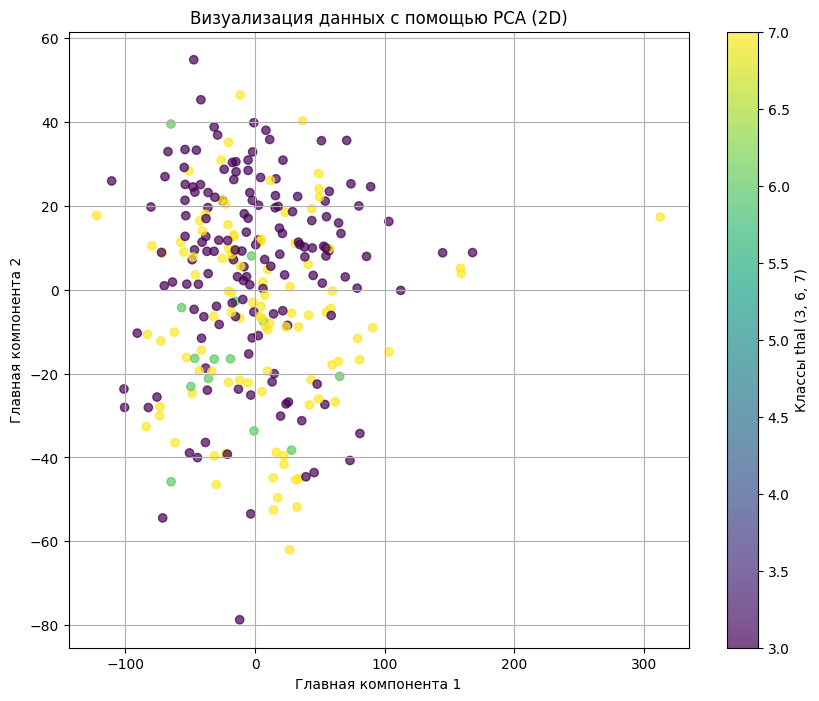

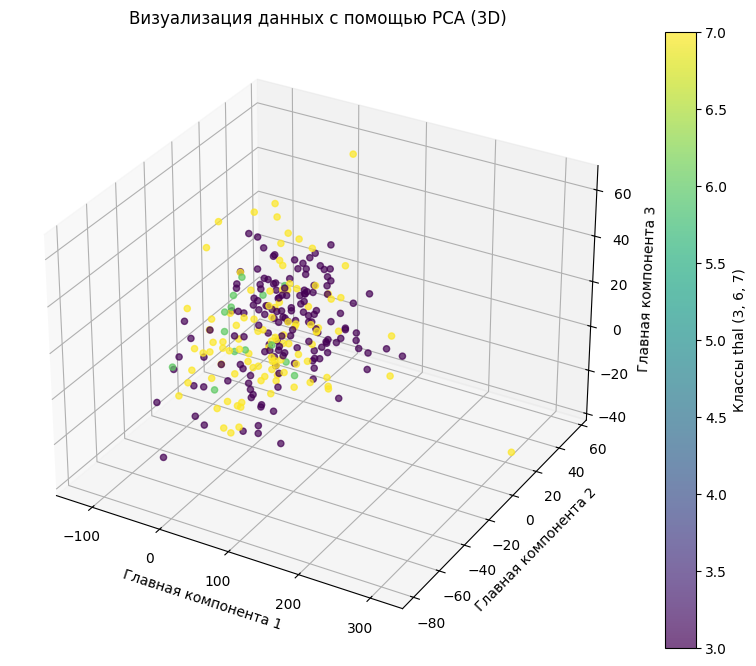

–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å PCA (2D): 0.6481
–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å PCA (3D): 0.5926


In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

# 2D –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ö–ª–∞—Å—Å—ã thal (3, 6, 7)')
plt.title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é PCA (2D)")
plt.xlabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
plt.ylabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
plt.grid(True)
plt.show()

# 3D –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ö–ª–∞—Å—Å—ã thal (3, 6, 7)')
ax.set_title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é PCA (3D)")
ax.set_xlabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
ax.set_ylabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
ax.set_zlabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 3")
plt.show()

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è PCA (2D –∏ 3D)
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_pca_2d, y_classification, test_size=0.2, random_state=42)
X_train_3d, X_test_3d = train_test_split(X_pca_3d, test_size=0.2, random_state=42)

# –ú–æ–¥–µ–ª—å
clf = RandomForestClassifier(random_state=42)

# –û–±—É—á–µ–Ω–∏–µ –Ω–∞ 2D –¥–∞–Ω–Ω—ã—Ö
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å PCA (2D): {accuracy_2d:.4f}")

# –û–±—É—á–µ–Ω–∏–µ –Ω–∞ 3D –¥–∞–Ω–Ω—ã—Ö
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_3d = accuracy_score(y_test, y_pred_3d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å PCA (3D): {accuracy_3d:.4f}")

<h5>T-SNE</h5>

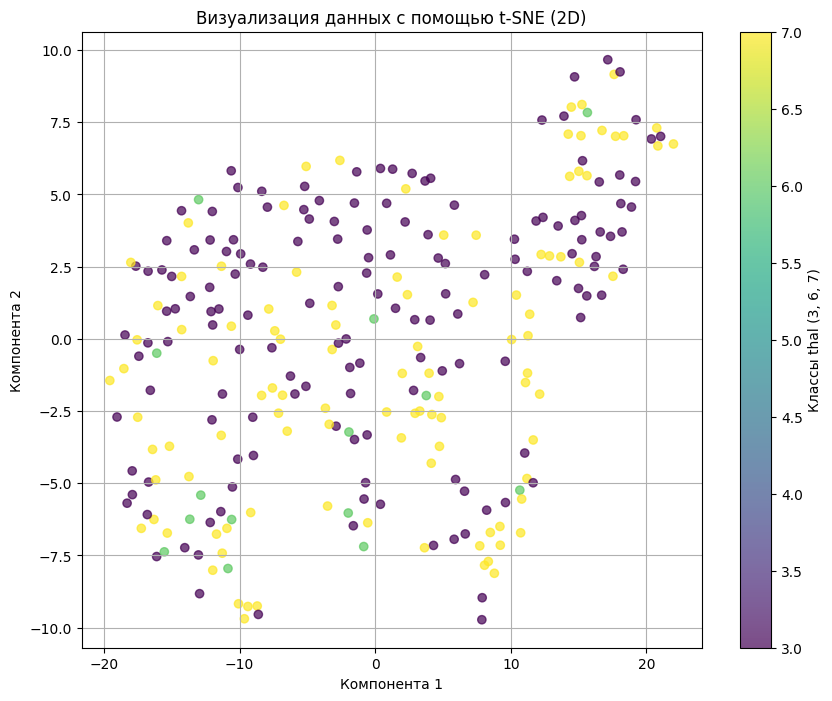

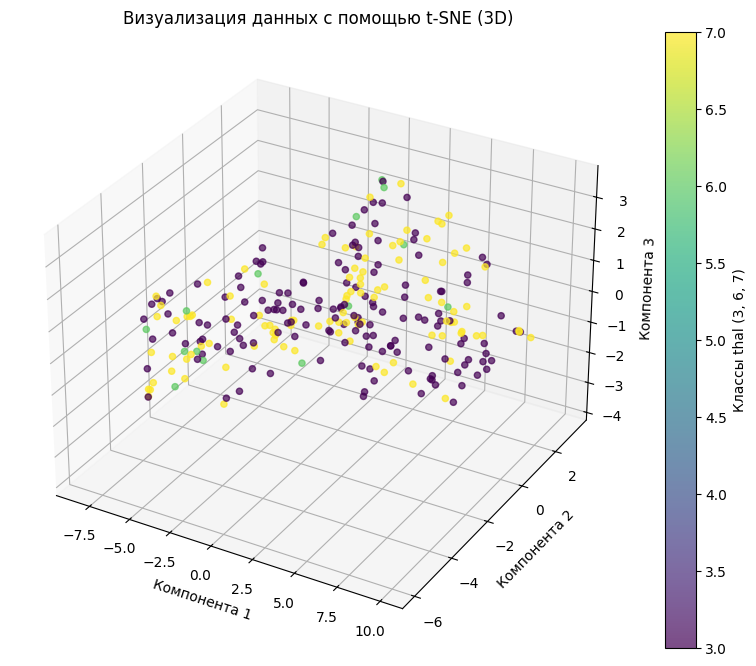

–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å t-SNE (2D): 0.5370
–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å t-SNE (3D): 0.5926


In [12]:
from sklearn.manifold import TSNE

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é t-SNE
tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

# 2D –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ö–ª–∞—Å—Å—ã thal (3, 6, 7)')
plt.title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é t-SNE (2D)")
plt.xlabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
plt.ylabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
plt.grid(True)
plt.show()

# 3D –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è t-SNE
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ö–ª–∞—Å—Å—ã thal (3, 6, 7)')
ax.set_title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é t-SNE (3D)")
ax.set_xlabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
ax.set_ylabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
ax.set_zlabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 3")
plt.show()

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è t-SNE (2D –∏ 3D)
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_tsne_2d, y_classification, test_size=0.2, random_state=42)
X_train_3d, X_test_3d = train_test_split(X_tsne_3d, test_size=0.2, random_state=42)

# –ú–æ–¥–µ–ª—å
clf = RandomForestClassifier(random_state=42)

# –û–±—É—á–µ–Ω–∏–µ –Ω–∞ 2D –¥–∞–Ω–Ω—ã—Ö
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å t-SNE (2D): {accuracy_2d:.4f}")

# –û–±—É—á–µ–Ω–∏–µ –Ω–∞ 3D –¥–∞–Ω–Ω—ã—Ö
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_3d = accuracy_score(y_test, y_pred_3d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å t-SNE (3D): {accuracy_3d:.4f}")


<h5>UMAP</h5>

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


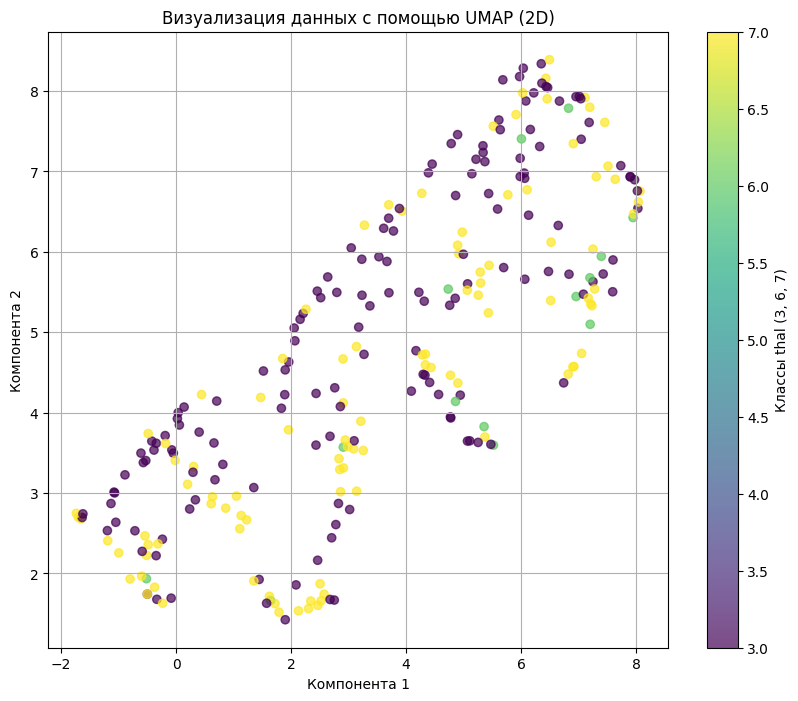

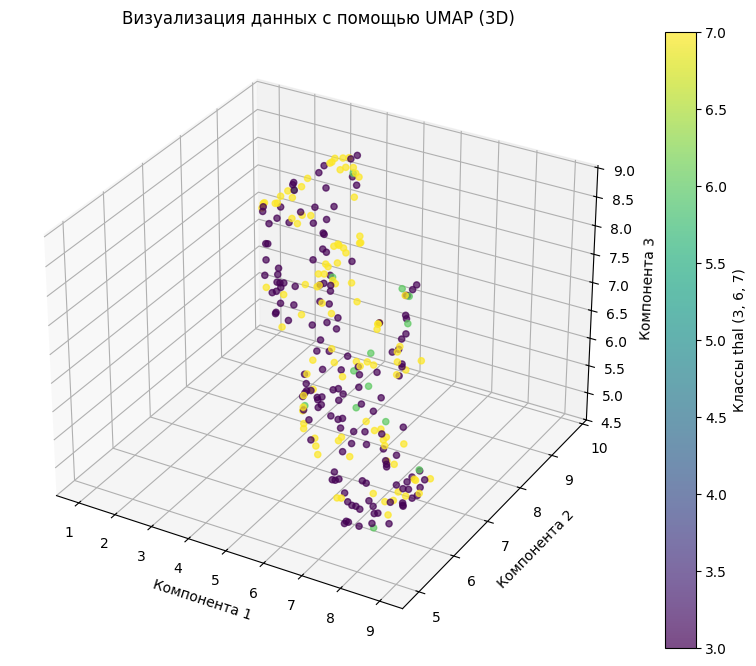

–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å UMAP (2D): 0.5741
–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å UMAP (3D): 0.6111


In [13]:
import umap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

umap_3d = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_3d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))


plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ö–ª–∞—Å—Å—ã thal (3, 6, 7)')
plt.title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é UMAP (2D)")
plt.xlabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
plt.ylabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
plt.grid(True)
plt.show()


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ö–ª–∞—Å—Å—ã thal (3, 6, 7)')
ax.set_title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é UMAP (3D)")
ax.set_xlabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
ax.set_ylabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
ax.set_zlabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 3")
plt.show()

X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_umap_2d, y_classification, test_size=0.2, random_state=42)
X_train_3d, X_test_3d = train_test_split(X_umap_3d, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å UMAP (2D): {accuracy_2d:.4f}")


clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_3d = accuracy_score(y_test, y_pred_3d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å UMAP (3D): {accuracy_3d:.4f}")


–í—Ä–æ–¥–µ –µ—Å—Ç—å –∫–∞–∫–∞—è-—Ç–æ —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –¥–∞–∂–µ ü§î


<h4>–ü–æ–∏—Å–∫ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ GridSearch –∏ RandomSearch</h4>

<h5>–†–µ–≥—Ä–µ—Å—Å–∏—è</h5>

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ø–æ–∏—Å–∫–∞
param_grid_regression = {
    'regressor__alpha': [0.1, 1.0, 10.0]  # –ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ –¥–ª—è Ridge
}

param_random_regression = {
    'regressor__alpha': np.linspace(0.1, 10, 100)  # –î–∏–∞–ø–∞–∑–æ–Ω –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ø–æ–∏—Å–∫–∞
}

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),
    ('regressor', Ridge())
], verbose=True)

# GridSearchCV –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
grid_search_reg = GridSearchCV(regression_pipeline, param_grid=param_grid_regression, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_reg.fit(X_train_reg, y_train_reg)
print("\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (GridSearch) –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:", grid_search_reg.best_params_)
print("–õ—É—á—à–∏–π MSE (GridSearch):", -grid_search_reg.best_score_)

# RandomizedSearchCV –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
random_search_reg = RandomizedSearchCV(regression_pipeline, param_distributions=param_random_regression, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42)
random_search_reg.fit(X_train_reg, y_train_reg)
print("\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (RandomSearch) –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:", random_search_reg.best_params_)
print("–õ—É—á—à–∏–π MSE (RandomSearch):", -random_search_reg.best_score_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransforme

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (GridSearch) –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: {'regressor__alpha': 10.0}

–õ—É—á—à–∏–π MSE (GridSearch): 339.60461383218075

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (RandomSearch) –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: {'regressor__alpha': 8.4}

–õ—É—á—à–∏–π MSE (RandomSearch): 340.353945450381

–í–º–µ—Å—Ç–æ Ridge –ø—Ä–æ–±–æ–≤–∞–ª–∞ –µ—â–µ GradientBoostingRegressor –∏ RandomForestRegressor - —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ö—É–∂–µ

<h5>–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è</h5>

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ø–æ–∏—Å–∫–∞
param_grid_classification = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

param_random_classification = {
    'classifier__max_depth': np.arange(1, 20),
    'classifier__min_samples_split': np.arange(2, 20)
}

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),
    ('classifier', DecisionTreeClassifier(random_state=42))
], verbose=True)

# GridSearchCV –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
grid_search_clf = GridSearchCV(classification_pipeline, param_grid=param_grid_classification, cv=5, scoring='accuracy', verbose=1)
grid_search_clf.fit(X_train_clf, y_train_clf)
print("\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (GridSearch) –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:", grid_search_clf.best_params_)
print("–õ—É—á—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å (GridSearch):", grid_search_clf.best_score_)

# RandomizedSearchCV –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
random_search_clf = RandomizedSearchCV(classification_pipeline, param_distributions=param_random_classification, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)
random_search_clf.fit(X_train_clf, y_train_clf)
print("\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (RandomSearch) –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:", random_search_clf.best_params_)
print("–õ—É—á—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å (RandomSearch):", random_search_clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransforme

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (GridSearch) –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10}

–õ—É—á—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å (GridSearch): 0.6300211416490485

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (RandomSearch) –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: {'classifier__min_samples_split': 9, 'classifier__max_depth': 2}

–õ—É—á—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å (RandomSearch): 0.703276955602537

<h5>RandomForest</h5>

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Disease'])
y = df['Disease']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ —á–∏—Å–ª–æ–≤—ã–µ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
encoder = OneHotEncoder()
X_train_categorical = encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_features]).toarray()

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
import numpy as np
X_train_transformed = np.hstack([X_train_numeric, X_train_categorical])
X_test_transformed = np.hstack([X_test_numeric, X_test_categorical])

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# –û–±—É—á–µ–Ω–∏–µ RandomForestClassifier —Å RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=1
)

random_search.fit(X_train_transformed, y_train)

# –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏ —Ç–æ—á–Ω–æ—Å—Ç—å
best_params = random_search.best_params_
best_score = random_search.best_score_

# –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
y_pred = random_search.best_estimator_.predict(X_test_transformed)
test_accuracy = accuracy_score(y_test, y_pred)

print("\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", best_params)
print(f"–õ—É—á—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {best_score:.4f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {test_accuracy:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': True}
–õ—É—á—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.8200
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.8519


–ù–∞ –≤—Å–µ—Ö –º–µ—Ç–æ–¥–∞—Ö RandomSearch –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å - —Å–ª—É—á–∞–π–Ω–æ–µ –¥–µ—Ä–µ–≤–æ

<h4>–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è MNIST —Å —è–∫—ã–∫–æ–º –∂–µ—Å—Ç–æ–≤ (t-SNE, RSA)</h4>

<h5>–ó–∞–≥—Ä—É–∂–∞—é –¥–∞–Ω–Ω—ã–µ, –≤—ã–±—Ä–∞–ª–∞ MNIST —Å kaggle —Å —è–∑—ã–∫–æ–º –∂–µ—Å—Ç–æ–≤ –¥–ª—è –∞–Ω–≥–ª–∏—Å–∫–æ–≥–æ —è–∑—ã–∫–∞. –í –Ω–µ–º 24 –∫–ª–∞—Å—Å–∞, –∫–∞–∂–¥—ã–π –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç –±—É–∫–≤—É –∞–Ω–≥–ª–∏—Å–∫–æ–≥–æ –∞–ª—Ñ–∞–≤–∏—Ç–∞ (–ù–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç J –∏ Z) </h5>

In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\datamunge\sign-language-mnist\versions\1


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

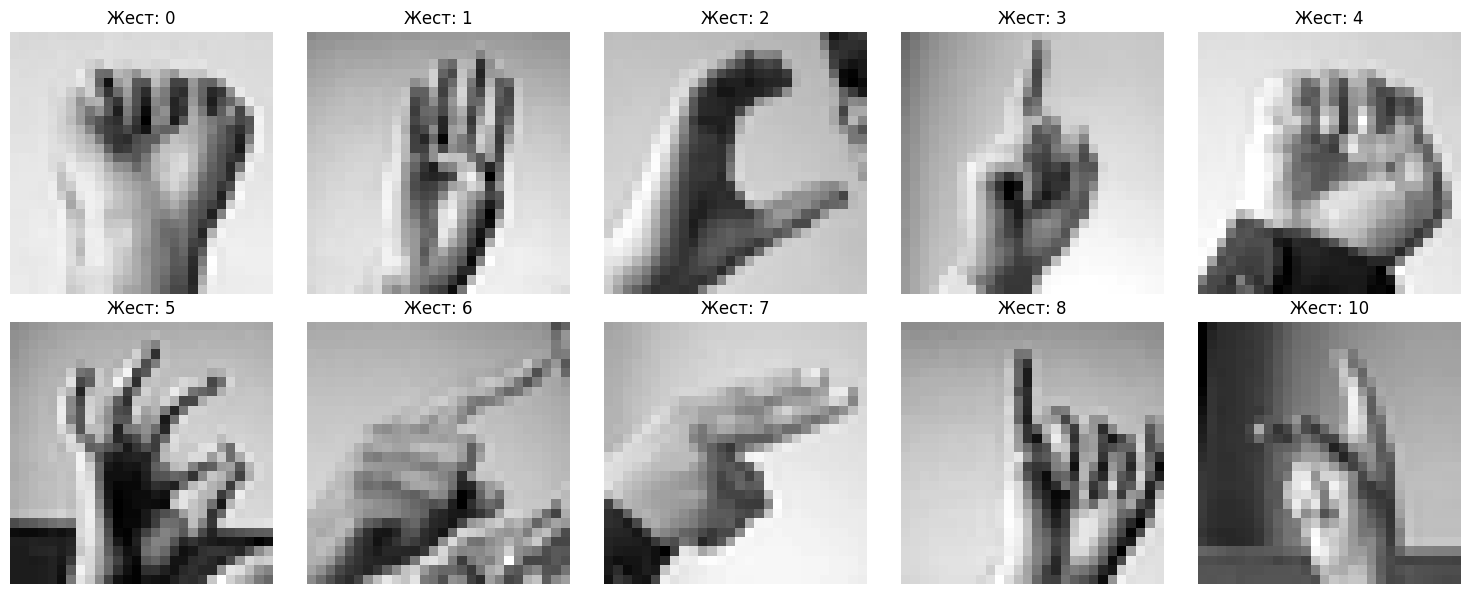

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('C:/Users/User/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('C:/Users/User/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1/sign_mnist_test/sign_mnist_test.csv')

print(train_df.head())

X = train_df.drop('label', axis=1).values  
y = train_df['label'].values  
plt.figure(figsize=(15, 6))

unique_labels = np.unique(y)[:10] 
for i, label in enumerate(unique_labels):

    idx = (y == label).argmax()
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[idx].reshape(28, 28), cmap='gray', interpolation='nearest')
    plt.title(f"–ñ–µ—Å—Ç: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


<h5>RSA</h5>

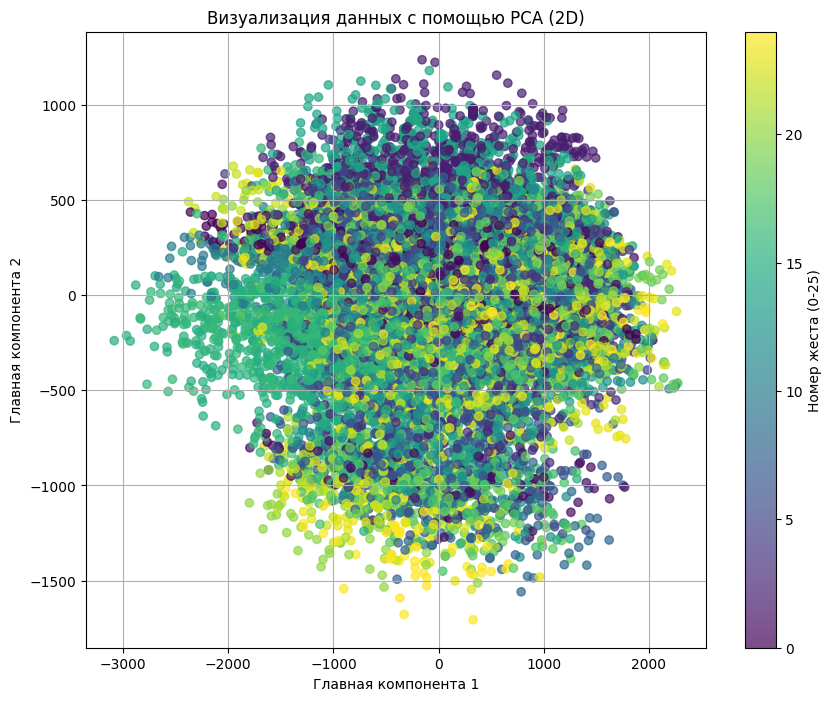

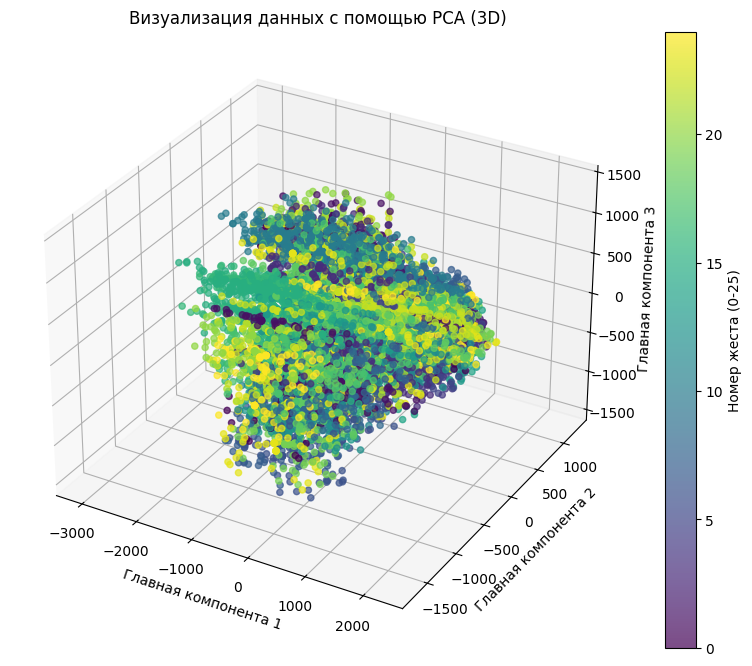

–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å PCA (2D): 0.3559
–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å PCA (3D): 0.5192


In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# PCA: 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ù–æ–º–µ—Ä –∂–µ—Å—Ç–∞ (0-25)')
plt.title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é PCA (2D)")
plt.xlabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
plt.ylabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
plt.grid(True)
plt.show()

# PCA: 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ù–æ–º–µ—Ä –∂–µ—Å—Ç–∞ (0-25)')
ax.set_title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é PCA (3D)")
ax.set_xlabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
ax.set_ylabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
ax.set_zlabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 3")
plt.show()

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ PCA (2D)
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_pca_2d, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_pca_2d = accuracy_score(y_test, y_pred_2d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å PCA (2D): {accuracy_pca_2d:.4f}")

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ PCA (3D)
X_train_3d, X_test_3d = train_test_split(X_pca_3d, test_size=0.2, random_state=42)
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_pca_3d = accuracy_score(y_test, y_pred_3d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å PCA (3D): {accuracy_pca_3d:.4f}")

<h5>t-SNE</h5>

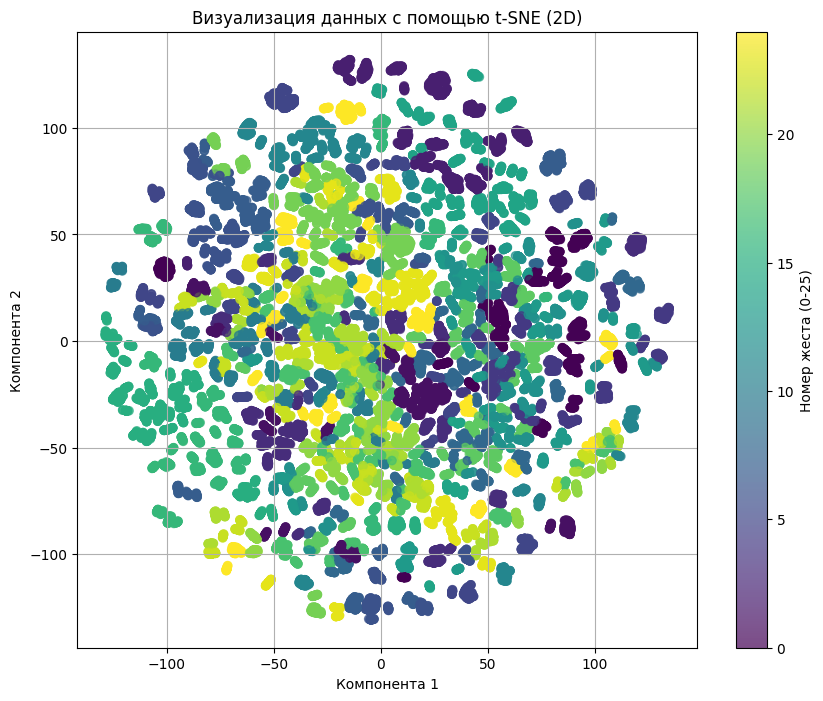

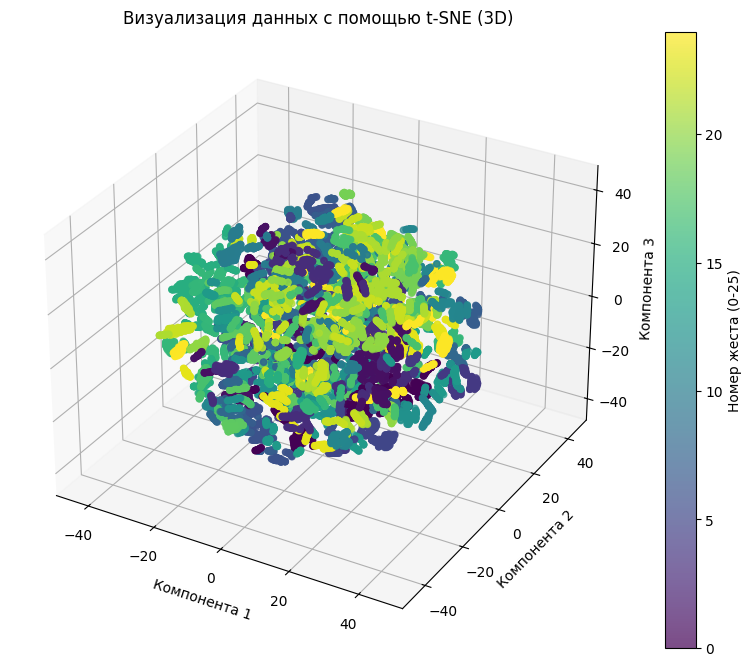

–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å t-SNE (2D): 0.9967
–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å t-SNE (3D): 0.9989


In [20]:
from sklearn.manifold import TSNE

# t-SNE: 2D
tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ù–æ–º–µ—Ä –∂–µ—Å—Ç–∞ (0-25)')
plt.title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é t-SNE (2D)")
plt.xlabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
plt.ylabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
plt.grid(True)
plt.show()

# t-SNE: 3D
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ù–æ–º–µ—Ä –∂–µ—Å—Ç–∞ (0-25)')
ax.set_title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é t-SNE (3D)")
ax.set_xlabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
ax.set_ylabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
ax.set_zlabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 3")
plt.show()

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ t-SNE (2D)
X_train_tsne_2d, X_test_tsne_2d = train_test_split(X_tsne_2d, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_tsne_2d, y_train)
y_pred_tsne_2d = clf.predict(X_test_tsne_2d)
accuracy_tsne_2d = accuracy_score(y_test, y_pred_tsne_2d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å t-SNE (2D): {accuracy_tsne_2d:.4f}")

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ t-SNE (3D)
X_train_tsne_3d, X_test_tsne_3d = train_test_split(X_tsne_3d, test_size=0.2, random_state=42)
clf.fit(X_train_tsne_3d, y_train)
y_pred_tsne_3d = clf.predict(X_test_tsne_3d)
accuracy_tsne_3d = accuracy_score(y_test, y_pred_tsne_3d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å t-SNE (3D): {accuracy_tsne_3d:.4f}")